In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /home/s4szqx/anaconda3/lib/python3.6/site-packages


In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

%matplotlib inline

In [4]:
# load the brain networks example dataset
df = sns.load_dataset('brain_networks', header=[0, 1, 2], index_col=0)

In [5]:
df.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5               ...             16  \
node             1                     1               ...              3   
hemi            lh         rh         lh         rh    ...             rh   
0        47.461037  26.746613 -35.898861  -1.889181    ...       0.607904   
1        -1.210660 -19.012897  19.568010  15.902983    ...      57.495071   
2       -65.575806 -85.777428  19.247454  37.209419    ...      28.317369   
3       -41.800869 -58.610184  32.896915  11.199619    ...      71.439629   
4       -62.613335 -49.076508  18.396759   3.219077    ...      95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

In [6]:
# select a subset of the networks

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values('network').astype(int).isin(used_networks))

df = df.loc[:, used_columns]

In [7]:
# create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

In [8]:
# convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values('network')
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

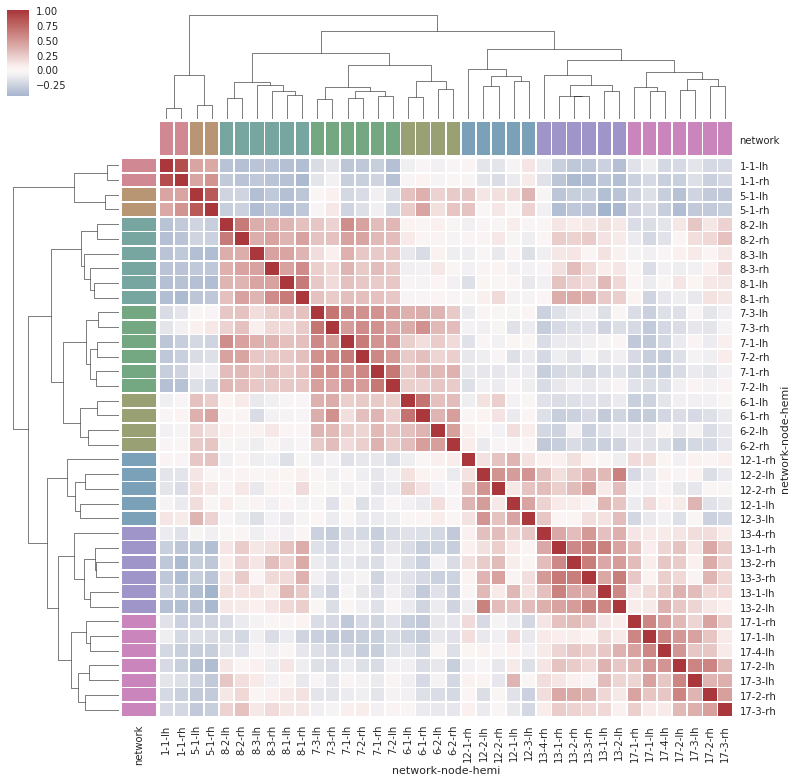

In [10]:
# draw the full plot
sns.clustermap(df.corr(), center=0, cmap='vlag', \
               row_colors=network_colors, col_colors=network_colors, \
              linewidths=.75, figsize=(13, 13))

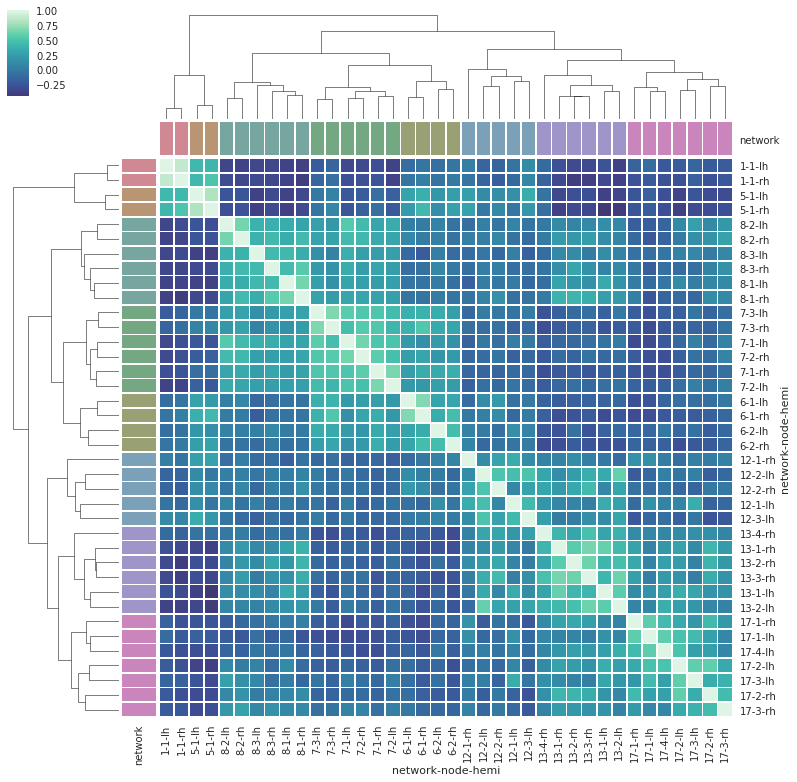

In [12]:
# draw the full plot
sns.clustermap(df.corr(), center=0, cmap='mako', \
               row_colors=network_colors, col_colors=network_colors, \
              linewidths=.75, figsize=(13, 13))